### Wikipedia Webscraping Project

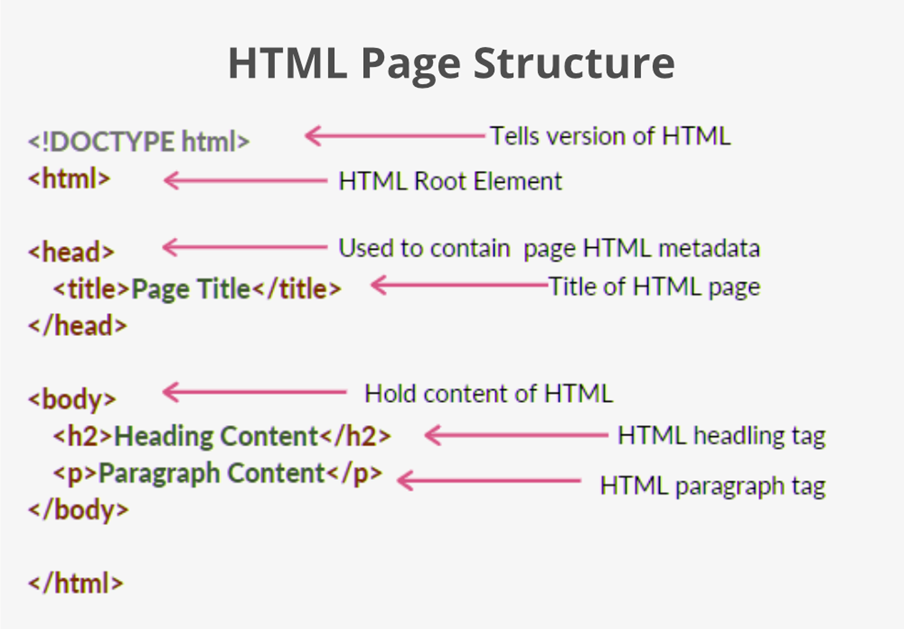

### 1. Get the html content from wikipedia

In [1]:
%pip install requests beautifulsoup4 lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
url1 = "https://en.wikipedia.org/wiki/World_population"

In [4]:
print(url1)

https://en.wikipedia.org/wiki/World_population


In [5]:
import requests

In [6]:
response = requests.get(url1)
response

<Response [200]>

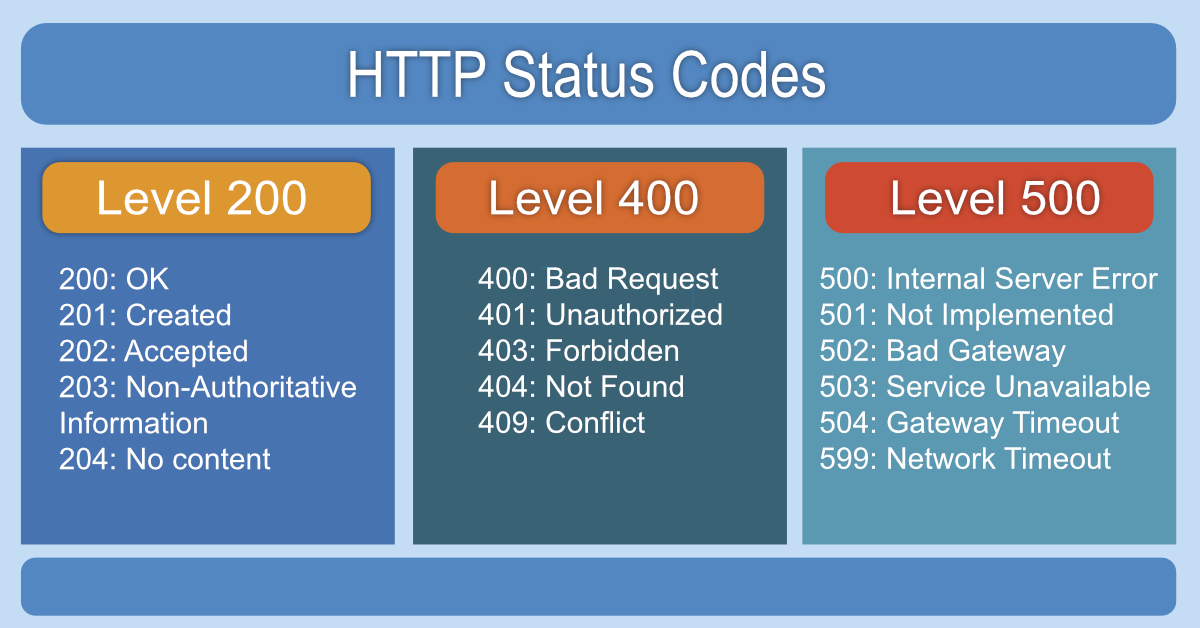

### If status code is 200 you are allowed to do webscraping
### 200 - ok

In [7]:
content = response.content
print(content[0:100])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la'


In [8]:
type(content)

bytes

### Get the soup of this HTML data

In [9]:
from bs4 import BeautifulSoup

In [10]:
soup = BeautifulSoup(content)

In [11]:
type(soup)

bs4.BeautifulSoup

### 1. Show the title of the webpage

In [12]:
title_tag = soup.find("title")
title_tag

<title>World population - Wikipedia</title>

In [13]:
title_text = title_tag.text
title_text

'World population - Wikipedia'

### 2. Show main heading h1 tag from the page

In [14]:

h1_tag = soup.find("h1", class_ = "firstHeading")
h1_tag

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [15]:
h1_text = h1_tag.text
h1_text

'World population'

### 3. getting all subheadings from the website

In [20]:

sub_tags = soup.find_all("div", class_ = "mw-heading")
sub_tags

[<div class="mw-heading mw-heading2"><h2 id="History">History</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ancient_and_post-classical_history">Ancient and post-classical history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Modern_history">Modern history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Milestones_by_the_billions">Milestones by the billions</h3></div>,
 <div class="mw-heading mw-heading2"><h2 id="Global_demographics">Global demographics</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Population_by_region">Population by region</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Largest_populations_by_country">Largest populations by country</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ten_most_populous_countries">Ten most populous countries</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Most_densely_populated_countries">Most densely populated countries</h3></div>,
 <div class="mw-heading mw-heading2"><h2 i

In [21]:
sub_tags[0]

<div class="mw-heading mw-heading2"><h2 id="History">History</h2></div>

In [22]:
sub_tags[0].text

'History'

In [24]:
sub_text = [tag.text for tag in sub_tags]
sub_text

['History',
 'Ancient and post-classical history',
 'Modern history',
 'Milestones by the billions',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Ten most populous countries',
 'Most densely populated countries',
 'Fluctuation',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Mathematical approximations',
 'Years for world population to double',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Citations',
 'General and cited sources',
 'Further reading',
 'External links']

### Getting all text content and saving a .txt file

In [26]:
p_tags = soup.find_all("p")
p_tags[0:3]

[<p class="mw-empty-elt">
 </p>,
 <p>In <a href="/wiki/Demographics_of_the_world" title="Demographics of the world">world demographics</a>, the <b>world population</b> is the total number of <a href="/wiki/Human" title="Human">humans</a> currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human <a href="/wiki/Prehistory" title="Prehistory">prehistory</a> and <a href="/wiki/Human_history" title="Human history">history</a> for the human population to reach a billion and only 218 more years to reach 8 billion.
 </p>,
 <p>The human population has experienced <a href="/wiki/Population_growth" title="Population growth">continuous growth</a> following the <a href="/wiki/Great_Famine_of_1315%E2%80%931317" title="Great Famine of 1315–1317">Great Famine of 1315–1317</a> and the end of the <a href="/wiki/Black_Death" title="Black Death">Black Death</a> in 1350, when it was nearly 370,000,000.<sup class="refer

In [27]:
p_text = [tag.text for tag in p_tags]
p_text[0:3]

['\n',
 'In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 more years to reach 8\xa0billion.\n',
 'The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affair

In [28]:
p_str = "\n".join(p_text)
print(p_str[0:100])



In world demographics, the world population is the total number of humans currently alive. It was 


In [29]:
with open("WorldPop.txt", "w", encoding="utf-8") as file1:
    file1.write(p_str)

### Get all the images links from this website

In [30]:
a_tags = soup.find_all("a", class_ = "mw-file-description")
a_tags

[<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="233" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/310px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/465px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/620px-World_Population_Prospects.svg.png 2x" width="310"/></a>,
 <a class="mw-file-description" href="/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png"><img class="mw-file-element" data-file-height="7747" data-file-width="5201" decoding="async" height="387" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png/260px-Illustration_of_contempor

In [31]:
a_tags[0].get("href")

'/wiki/File:World_Population_Prospects.svg'

In [32]:
home_page = "https://en.wikipedia.org"

In [34]:
home_page + a_tags[0].get("href")

'https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg'

In [35]:
img_links = [home_page + tag.get("href") for tag in a_tags]
img_links

['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org/wiki/File:2020_1million_cities.jpg',
 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org/wiki/File:World_population_counter,_Eureka,_Halifax,_

### Get all the tables from website

In [36]:
table_tags = soup.find_all("table", class_ = "wikitable")

In [37]:
table_tags[0]

<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
<caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_58-0"><a href="#cite_note-:6-58"><span class="cite-bracket">[</span>58<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
</caption>
<tbody><tr>
<th scope="row">Population
</th>
<th scope="col">1
</th>
<th scope="col">2
</th>
<th scope="col">3
</th>
<th scope="col">4
</th>
<th scope="col">5
</th>
<th scope="col">6
</th>
<th scope="col">7
</th>
<th scope="col">8
</th>
<th scope="col">9
</th>
<th scope="col">10
</th></tr>
<tr>
<th scope="row">Year
</th>
<td>1804</td>
<td>1927</td>
<td>1960</td>
<td>1974</td>
<td>1987</td>
<td>1999</td>
<td>2011</td>
<td>2022</td>
<td><i>2037</i></td>
<td><i>2057</i>
</td></tr>
<tr>
<th scope="row">Years elapsed
</th>
<td>200,000+</td>
<td>123</td>
<td>33</td>
<td>14</td>
<td>13</td>
<td>12</td>
<td>12</td>
<td>11</td>
<td><i>15</i></td>
<td

In [38]:
import pandas as pd

In [39]:
df1 = pd.read_html(str(table_tags[0]))[0]
df1

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [40]:
type(df1)

pandas.core.frame.DataFrame

In [41]:
df1.to_csv("Population.csv", index=False)

In [43]:
d = pd.read_csv("Population.csv")
d

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


### Converting all tables to dataframe

In [44]:
dfs = []
for tag in table_tags:
    d = pd.read_html(str(tag))[0]
    display(d)
    dfs.append(d)

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[86],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.5%,14 Apr 2023,UN projection[89]
1,China,1409670000,17.3%,17 Jan 2024,National annual estimate[90]
2,United States,337598242,4.14%,6 Mar 2025,National population clock[91]
3,Indonesia,278696200,3.41%,1 Jul 2023,National annual estimate[92]
4,Pakistan,229488994,2.81%,1 Jul 2022,UN projection[93]
5,Nigeria,216746934,2.66%,1 Jul 2022,UN projection[93]
6,Brazil,218880455,2.68%,6 Mar 2025,National population clock[94]
7,Bangladesh,168220000,2.06%,1 Jul 2020,Annual Population Estimate[95]
8,Russia,147190000,1.80%,1 Oct 2021,2021 preliminary census results[96]
9,Mexico,128271248,1.57%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org."
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,"Graphs are unavailable due to technical issues. Updates on reimplementing the Graph extension, which will be known as the Chart extension, can be found on Phabricator and on MediaWiki.org.",Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][99],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[100]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[116]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[117]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin America/Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2024,8160,"4,810 (58.9%)","1,520 (18.6%)",745 (9.1%),663 (8.1%),385 (4.7%),46 (0.6%)
2,2050,9660,"5,280 (54.7%)","2,470 (25.6%)",703 (7.3%),730 (7.6%),426 (4.4%),57 (0.6%)
3,2075,10250,"5,100 (49.8%)","3,290 (32.1%)",636 (6.2%),698 (6.8%),452 (4.4%),66 (0.6%)
4,2100,10180,"4,610 (45.3%)","3,810 (37.4%)",592 (5.8%),613 (6.0%),475 (4.7%),73 (0.7%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[140],c. 2100[140]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


### Write a code to webscrap anu wikipedia webpage

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [46]:
class WikiScraper:

    def __init__(self, url: str):
        self.url = url
        self.response = requests.get(self.url)
        self.response.raise_for_status()
        self.soup = BeautifulSoup(self.response.content)

    def get_title(self):
        title_tag = self.soup.find("title")
        return title_tag.text
    
    def get_h1_tag(self):
        h1_tag = self.soup.find("h1", class_ = "firstHeading")
        return h1_tag.text
    
    def get_subheadings(self):
        sub_tags = self.soup.find_all("div", class_ = "mw-heading")
        sub_text = [tag.text for tag in sub_tags]
        return sub_text
    
    def get_paragraphs(self):
        p_tags = self.soup.find_all("p")
        p_text = [tag.text for tag in p_tags]
        p_str = "\n".join(p_text)
        return p_str
    
    def save_text(self, filename:str, content:str):
        with open(filename, "w", encoding="utf-8") as file1:
            file1.write(content)

    def get_image_urls(self):
        home_page = "https://en.wikipedia.org"
        a_tags = self.soup.find_all("a", class_ = "mw-file-description")
        img_links = [home_page + tag.get("href") for tag in a_tags]
        return img_links
    
    def get_tables(self):
        table_tags = self.soup.find_all("table", class_ = "wikitable")
        dfs = []
        for tag in table_tags:
            d = pd.read_html(str(tag))[0]
            dfs.append(d)
        return dfs
    
    def save_dataframe(self, filename: str, df: pd.DataFrame):
        df.to_csv(filename, index=False)

### Scraping other wikipedia pages

In [47]:
s1 = WikiScraper(url= "https://en.wikipedia.org/wiki/Data_analysis")
type(s1)

__main__.WikiScraper

In [48]:
s1.url

'https://en.wikipedia.org/wiki/Data_analysis'

In [49]:
s1.response

<Response [200]>

In [50]:
s1.get_title()

'Data analysis - Wikipedia'

In [51]:
s1.get_h1_tag()

'Data analysis'

In [52]:
s1.get_subheadings()

['Data analysis process[edit]',
 'Data requirements[edit]',
 'Data collection[edit]',
 'Data processing[edit]',
 'Data cleaning[edit]',
 'Exploratory data analysis[edit]',
 'Modeling and algorithms[edit]',
 'Data product[edit]',
 'Communication[edit]',
 'Quantitative messages[edit]',
 'Analyzing quantitative data[edit]',
 'Analytical activities of data users[edit]',
 'Barriers to effective analysis[edit]',
 'Confusing fact and opinion[edit]',
 'Cognitive biases[edit]',
 'Innumeracy[edit]',
 'Other topics[edit]',
 'Smart buildings[edit]',
 'Analytics and business intelligence[edit]',
 'Education[edit]',
 'Practitioner notes[edit]',
 'Initial data analysis[edit]',
 'Quality of data[edit]',
 'Quality of measurements[edit]',
 'Initial transformations[edit]',
 'Did the implementation of the study fulfill the intentions of the research design?[edit]',
 'Characteristics of data sample[edit]',
 'Final stage of the initial data analysis[edit]',
 'Analysis[edit]',
 'Nonlinear analysis[edit]',
 '

In [53]:
s1.get_image_urls()

['https://en.wikipedia.org/wiki/File:Rayleigh-Taylor_instability.jpg',
 'https://en.wikipedia.org/wiki/File:Data_visualization_process_v1.png',
 'https://en.wikipedia.org/wiki/File:Relationship_of_data,_information_and_intelligence.png',
 'https://en.wikipedia.org/wiki/File:Social_Network_Analysis_Visualization.png',
 'https://en.wikipedia.org/wiki/File:Total_Revenues_and_Outlays_as_Percent_GDP_2013.png',
 'https://en.wikipedia.org/wiki/File:U.S._Phillips_Curve_2000_to_2013.png',
 'https://en.wikipedia.org/wiki/File:US_Employment_Statistics_-_March_2015.png',
 'https://en.wikipedia.org/wiki/File:User-activities.png',
 'https://en.wikipedia.org/wiki/File:Wikiversity_logo_2017.svg']

In [54]:
paras = s1.get_paragraphs()
print(paras[0:100])

Data analysis is the process of inspecting, cleansing, transforming, and modeling data with the goal


In [55]:
s1.save_text("DataSnalysis.txt", paras)

In [56]:
dfs = s1.get_tables()
dfs

[     #                       Task  \
 0    1             Retrieve Value   
 1    2                     Filter   
 2    3      Compute Derived Value   
 3    4              Find Extremum   
 4    5                       Sort   
 5    6            Determine Range   
 6    7  Characterize Distribution   
 7    8             Find Anomalies   
 8    9                    Cluster   
 9   10                  Correlate   
 10  11      Contextualization[81]   
 
                                   General Description  \
 0   Given a set of specific cases, find attributes...   
 1   Given some concrete conditions on attribute va...   
 2   Given a set of data cases, compute an aggregat...   
 3   Find data cases possessing an extreme value of...   
 4   Given a set of data cases, rank them according...   
 5   Given a set of data cases and an attribute of ...   
 6   Given a set of data cases and a quantitative a...   
 7   Identify any anomalies within a given set of d...   
 8   Given a set of 

In [57]:
len(dfs)

1

In [58]:
dfs[0]

,#,Task,General Description,Pro Forma Abstract,Examples
0,1,Retrieve Value,"Given a set of specific cases, find attributes...","What are the values of attributes {X, Y, Z, .....",- What is the mileage per gallon of the Ford M...
1,2,Filter,Given some concrete conditions on attribute va...,"Which data cases satisfy conditions {A, B, C...}?",- What Kellogg's cereals have high fiber? - Wh...
2,3,Compute Derived Value,"Given a set of data cases, compute an aggregat...",What is the value of aggregation function F ov...,- What is the average calorie content of Post ...
3,4,Find Extremum,Find data cases possessing an extreme value of...,What are the top/bottom N data cases with resp...,- What is the car with the highest MPG? - What...
4,5,Sort,"Given a set of data cases, rank them according...",What is the sorted order of a set S of data ca...,- Order the cars by weight. - Rank the cereals...
5,6,Determine Range,Given a set of data cases and an attribute of ...,What is the range of values of attribute A in ...,- What is the range of film lengths? - What is...
6,7,Characterize Distribution,Given a set of data cases and a quantitative a...,What is the distribution of values of attribut...,- What is the distribution of carbohydrates in...
7,8,Find Anomalies,Identify any anomalies within a given set of d...,Which data cases in a set S of data cases have...,- Are there exceptions to the relationship bet...
8,9,Cluster,"Given a set of data cases, find clusters of si...",Which data cases in a set S of data cases are ...,- Are there groups of cereals w/ similar fat/c...
9,10,Correlate,"Given a set of data cases and two attributes, ...",What is the correlation between attributes X a...,- Is there a correlation between carbohydrates...


In [59]:
s1.save_dataframe("Data.csv", dfs[0])

### Find out all the image links for given wikipedia websites

In [60]:
urls = [
     "https://en.wikipedia.org/wiki/Data_analysis",
    "https://en.wikipedia.org/wiki/World_population",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://en.wikipedia.org/wiki/JavaScript",
    "https://en.wikipedia.org/wiki/Go_(programming_language)"
]

In [61]:
# Create a blank image dictionary
imgs = {}

In [62]:
for i in urls:
    s = WikiScraper(i)
    h1 = s.get_h1_tag()
    print(f"Title - {h1}")
    img_links = s.get_image_urls()
    print(f"Image Links : {img_links}")
    imgs[h1] = img_links
    print("\n", "="*50, " \n")


Title - Data analysis
Image Links : ['https://en.wikipedia.org/wiki/File:Rayleigh-Taylor_instability.jpg', 'https://en.wikipedia.org/wiki/File:Data_visualization_process_v1.png', 'https://en.wikipedia.org/wiki/File:Relationship_of_data,_information_and_intelligence.png', 'https://en.wikipedia.org/wiki/File:Social_Network_Analysis_Visualization.png', 'https://en.wikipedia.org/wiki/File:Total_Revenues_and_Outlays_as_Percent_GDP_2013.png', 'https://en.wikipedia.org/wiki/File:U.S._Phillips_Curve_2000_to_2013.png', 'https://en.wikipedia.org/wiki/File:US_Employment_Statistics_-_March_2015.png', 'https://en.wikipedia.org/wiki/File:User-activities.png', 'https://en.wikipedia.org/wiki/File:Wikiversity_logo_2017.svg']


Title - World population
Image Links : ['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg', 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png', 'https://en.wikipedia.org/wiki/File:2020_1million_citie